Combining all parquets

In [1]:
import pandas as pd
import pyarrow.parquet as pq
import gc
import os

# Giriş dosyalarının bulunduğu klasör
input_folder = "C:/Users/mgoek/Desktop/Yeni klasör"
# Çıkış dosyası adı
output_file = "C:/Users/mgoek/secili_siraliveri.parquet"

# 20.000'er tane 0 ve 1 etiketli veriyi saklamak için listeler
zeros = []
ones = []

# Kaç adet örnek alındı (sayaç)
zero_count = 0
one_count = 0
max_per_label = 20000

# Parquet dosyalarının isimlerini al
file_list = sorted([f for f in os.listdir(input_folder) if f.endswith(".parquet")])

for file in file_list: 
    zero_count=0
    one_count=0
    one_rows=0
    zero_rows=0
    max_per_label=40000
    path = os.path.join(input_folder, file)
    print(f"İşleniyor: {file}")

    # Sadece ihtiyaç kadar veri toplanacak şekilde dosyayı oku
    df = pd.read_parquet(path, engine='pyarrow')
    float_cols = df.select_dtypes(include=['float64']).columns
    df[float_cols] = df[float_cols].astype('float32')
    
    # Hala eksik olan varsa, uygun şekilde filtrele
    if max_per_label >= (df['label'] == 1).sum():
        max_per_label=(df['label'] == 1).sum()
    print(max_per_label)
    needed_zeros = max_per_label - zero_count
    zero_rows = df[df['label'] == 0].head(needed_zeros)
    zero_count += len(zero_rows)
    zeros.append(zero_rows)


    needed_ones = max_per_label - one_count
    one_rows = df[df['label'] == 1].head(needed_ones)
    one_rows['label'] = 5
    one_count += len(one_rows)
    ones.append(one_rows)
    df=pd.DataFrame()  
    # normal=0 fabr=1 fuzz=2 masq=3 susp=4 reply=5

df=pd.DataFrame()
# Listeyi birleştir 

# Listeyi birleştir 
combined_df = pd.concat(zeros + ones, ignore_index=True)

# Tüm float sütunları float32'ye çevir


# Eğer dosya zaten varsa, oku ve birleştir
if os.path.exists(output_file):
    existing_data = pd.read_parquet(output_file)

    final_df = pd.concat([existing_data, combined_df], ignore_index=True)
    existing_data=pd.DataFrame()
else:
    final_df = combined_df

# Parquet dosyasına yaz
final_df.to_parquet("C:/Users/mgoek/secili_siraliveriV2.parquet", index=False)
print(f"Veriler eklendi veya dosya oluşturuldu: {output_file}")


İşleniyor: dump6-repl-0-120.parquet
40000
İşleniyor: dump6-repl-120-240.parquet
40000
İşleniyor: dump6-repl-240-360.parquet
40000
İşleniyor: dump6-repl-360-479.99999.parquet
40000
Veriler eklendi veya dosya oluşturuldu: C:/Users/mgoek/secili_siraliveri.parquet


Converting CSV File

In [ ]:
import pandas as pd

# Parquet dosyasını oku
df = pd.read_parquet("C:/Users/mgoek/birlesik_dosya.parquet")

# CSV dosyası olarak kaydet
df.to_csv("C:/Users/mgoek/birlesikIDS.csv", index=False)

RFC all features used and all features impact extracted and wroted txt file

Veri Tipleri:
 5B0_CF_Clu_Odometer        float32
549_BAT_SOF                float32
545_TEMP_FUEL              float32
50C_CF_Clu_AvgFCI          float32
549_BAT_SOC                float32
                            ...   
316_F_N_ENG                float32
07F_C_FrontFOGLhOpenSts    float32
220_YAW_RATE_STAT          float32
58B_CF_RCW_Warning         float32
label                        int64
Length: 450, dtype: object
Sayısal Olmayan Sütunlar: ['112_CUR_GR']
veri ön işleme başladı breakpoint
test ayırımı
model eğitimi
predict
Model Accuracy: 0.9855
Model Performansı:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368414
           1       0.96      0.95      0.95     99885
           2       1.00      0.99      0.99     65279
           3       0.95      0.96      0.95    101625
           4       0.99      0.99      0.99    101625

    accuracy                           0.99    736828
   macro avg       0.98      0.98      0

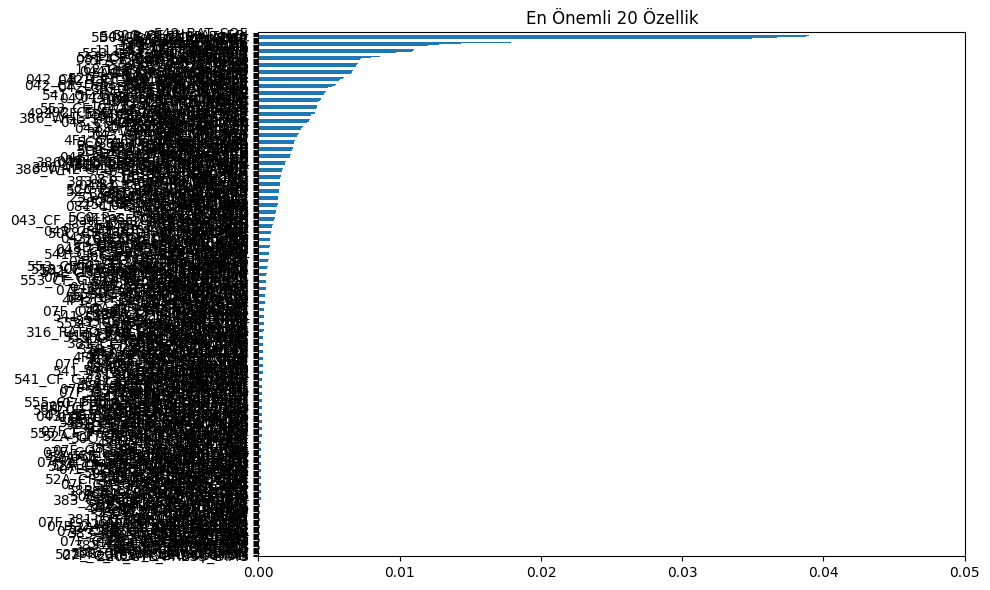

In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

selected_features=[
    "5B0_CF_Clu_Odometer",
"549_BAT_SOF",
"545_TEMP_FUEL",
"50C_CF_Clu_AvgFCI",
"549_BAT_SOC",
"549_BAT_SNSR_Temp",
"50C_CF_Clu_DTE",
"260_AliveCounter",
"549_BAT_SNSR_I",
"553_CF_Gway_ExtTailAct",
"081_CR_Ems_IndAirTemp",
"553_CF_Gway_IntTailAct",
"111_CF_Tcu_Alive1",
"112_CF_Tcu_Alive",
"18F_R_PAcnC",
"593_PRESSURE_RR",
"556_PID_0Dh",
"52A_CF_Clu_VehicleSpeed",
"113_CF_Tcu_Alive3",
"111_CF_Tcu_ChkSum1",
"593_STATUS_TPMS",
"386_WHL_SPD_RL",
"593_PRESSURE_FR",
"113_CF_Tcu_ChkSum3",
"593_PRESSURE_FL",
"593_PRESSURE_RL",
"5FA_CR_Wcs_ClassStat",
"162_Cluster_Engine_RPM",
"200_FCO",
"553_CF_Gway_AutoLightValue",
"557_PID_0Bh",
"547_IntAirTemp",
"57F_HU_Type",
"112_CF_Tcu_ChkSum",
"5FA_CR_Wcs_ErrStat",
"113_SLOPE_TCU",
"386_WHL_SPD_RR",
"4F1_CF_Clu_Vanz",
"5A0_CF_Acu_NumOfFlt",
"113_CF_Tcu_TarGr",
"042_CF_Datc_CO2_Warning",
"042_CR_Datc_RearDrTempDispF",
"541_CF_Gway_HeadLampLow",
"386_WHL_SPD_FL",
"386_WHL_SPD_FR",
"044_CF_Datc_VerMin",
"042_CR_Datc_PsTempDispF",
"220_LAT_ACCEL",
"2B0_SAS_Stat",
"080_N",
"164_CF_Esc_Chksum",
"162_Clutch_Driving_Tq",
"556_PID_0Ch",
"164_CF_Esc_AliveCnt",
"081_CF_Ems_Alive2",
"2B0_SAS_Angle",
"044_CF_Datc_IncarTemp",
"260_TQI_MAX",
"2B0_MsgCount",
"556_PID_11h",
"545_BAT_Alt_FR_Duty",
"080_CF_Ems_Alive",
"044_CR_Datc_OutTempF",
"555_CR_Fpcm_LPActPre",
"556_PID_04h",
"043_CF_Datc_RearBlwDisp",
"492_CF_Ems_ChecksumEMS9",
"387_WHL_PUL_FR",
"329_MUL_CODE",
"043_CF_Datc_OpSts",
"492_CF_Ems_AliveCounterEMS9",
"042_CR_Datc_DrTempDispF",
"316_N",
"042_CR_Datc_PsTempDispC",
"386_WHL_SPD_AliveCounter_LSB",
"47F_ROL_CNT_ESP",
"080_TQI_ACOR",
"112_VS_TCU",
"111_SWI_CC",
"220_LONG_ACCEL",
"081_BRAKE_ACT",
"47F__4WD_TQC_LIM",
"220_ESP12_Checksum",
"381_CR_Mdps_StrAng",
"220_CYL_PRES",
"557_PID_23h",
"316_TQI",
"316_VS",
"5D3_HU_PhoneActivity",
"220_YAW_RATE",
"58B_CF_Lca_Stat",
"329_CLU_ACK",
"387_WHL_PUL_FL",
"044_CF_Datc_VerMaj",
"260_Checksum",
"556_PID_05h",
"4F1_CF_Clu_RheostatLevel",
"383_CR_Fatc_OutTempSns",
"387_WHL_PUL_RL",
"329_TEMP_ENG",
"5C0_Audio_VolumeDown",
"260_ENG_STAT",
"042_CR_Datc_RearDrTempDispC",
"044_CR_Datc_OutTempC",
"251_CR_Mdps_StrTq",
"251_CR_Mdps_OutTq",
"044_CF_Datc_Type",
"043_CF_Datc_PwrInf",
"042_CR_Datc_DrTempDispC",
"387_WHL_PUL_RR",
"2B0_SAS_Speed",
"5C0_Pas_Spkr_Rcnt_Alarm",
"043_CF_Datc_ModDisp",
"5C0_Pas_Spkr_Rlh_Alarm",
"043_CF_Datc_PSModDisp",
"5D3_BlowerNoiseControl",
"387_WHL_PUL_Chksum",
"081_CF_Ems_ChkSum2",
"381_CF_Mdps_AliveCnt",
"386_WHL_SPD_Checksum_LSB",
"386_WHL_SPD_Checksum_MSB",
"381_CF_Mdps_Chksum",
"386_WHL_SPD_AliveCounter_MSB",
"2B0_CheckSum",
"58B_CF_Rcta_Stat",
"080_TQFR",
"251_CF_Mdps_MsgCount2",
"080_TQI",
"5D3_HU_VRActivity",
"316_TQFR",
"4F1_CF_Clu_AliveCnt1",
"251_CF_Mdps_Chksum2",
"043_CF_Datc_TempDispUnit",
"260_TQI",
"5C0_Pas_Spkr_Rrh_Alarm",
"383_CF_Fatc_ChkSum",
"043_CF_Datc_IonClean",
"52A_CF_Clu_LanguageInfo",
"383_CR_Fatc_OutTemp",
"52A_CF_Clu_InhibitD",
"112_ETL_TCU",
"316_TQI_ACOR",
"081_CF_Ems_EngOperStat",
"043_CF_Datc_ClmScanDisp",
"18F_TQI_B",
"18F_R_NEngIdlTgC",
"200_CF_Ems_PumpTPres",
"112_CUR_GR",
"112_SPK_RTD_TCU",
"549_BAT_SNSR_V",
"381_CR_Mdps_DrvTq",
"260_TQI_MIN",
"381_CF_Mdps_Stat",
"4F1_CF_Clu_DetentOut",
"5C0_Pas_Spkr_Fcnt_Alarm",
"043_CF_Datc_RearModDisp",
"5C0_Pas_Spkr_Frh_Alarm",
"251_CR_Mdps_StrColTq",
"080_PV_AV_CAN",
"545_AMP_CAN",
"329_CAN_VERS",
"329_TQ_STND",
"220_ESP12_AliveCounter",
"081_CR_Ems_SoakTimeExt",
"329_TPS",
"5C0_Pas_Spkr_Flh_Alarm",
"043_CF_Datc_FrontBlwDisp",
"5A0_CF_Acu_Dtc",
"043_CF_Datc_RearAutoDisp",
"153_CheckSum_TCS1",
"080_TQ_STND",
"111_TCU_OBD",
"329_BRAKE_ACT",
"557_PID_06h",
"50C_CF_Clu_AliveCnt2",
"153_AliveCounter_TCS1",
"080_CF_Ems_ChkSum",
"260_CF_Ems_AclAct",
"5A0_CF_PasBkl_FltStat",
"545_VB",
"112_VS_TCU_DECIMAL",
"260_TQI_TARGET",
"383_CF_Fatc_MsgCnt",
"329_PV_AV_CAN",
"18F_CF_Ems_IsgStat",
"200_Split_Stat",
"162_Cluster_Engine_RPM_Flag",
"043_CF_Datc_DualDisp",
"111_G_SEL_DISP",
"113_CF_Tcu_IsgInhib",
"043_CF_Datc_AcDisp",
"5A0_CF_SWL_Ind",
"043_CF_Datc_RearChgReqDisp",
"111_SWI_GS",
"557_PID_09h",
"043_CF_Datc_AutoDisp",
"557_PID_07h",
"587_CF_Tmu_TempSet",
"111_GEAR_TYPE",
"07F_C_DRLLampLhOpenSts",
"557_PID_08h",
"18F_CF_Ems_EngRunNorm",
"316_SWI_IGK",
"07F_C_HLampHighLhOpenSts",
"043_CF_Mtc_MaxAcDisp",
"587_CF_Tmu_AliveCnt1",
"383_CR_Fatc_TqAcnOut",
"549_BAT_SOH",
"50C_CF_Clu_TripUnit",
"553_CF_Gway_WiperParkPosition",
"07F_C_RearTSIGLhOpenSts",
"316_ACK_TCS",
"553_CF_Gway_SJBDeliveryMode",
"5A0_CF_Ods_IDRcv",
"043_CF_Datc_RearClimateScnDisp",
"553_CF_Gway_AutoLightOption",
"54C_Vehicle_Stop_Time",
"383_CF_Fatc_CtrInf",
"07F_C_FrontTSIGRhOpenSts",
"043_CF_Datc_AqsDisp",
"07F_C_SBendingLhOpenSts",
"5FA_CF_Ods_AcuRcvSN",
"07F_C_HLampLowLhOpenSts",
"541_CF_Gway_DrvSeatBeltSw",
"043_CF_Datc_AutoDefogBlink",
"556_PID_03h",
"541_CF_Gway_IGNSw",
"50C_CF_Clu_AltLStatus",
"50C_CF_Clu_AvgFCU",
"07F_C_RearEXTTailRhOpenSts",
"5FA_CF_Ods_PrcCmd",
"07F_C_SBendingRhOpenSts",
"5A0_CF_Ods_RZReq",
"541_CF_Gway_WiperIntT",
"4F1_CF_Clu_CruiseSwState",
"383_CF_FATC_Iden",
"111_TCU_TYPE",
"4F1_CF_Clu_CruiseSwMain",
"545_EMS_VS",
"043_CF_Datc_ChgReqDisp",
"4F1_CF_Clu_VanzDecimal",
"07F_C_HLampHighRhOpenSts",
"5A0_CF_DriBkl_Stat",
"381_CF_Mdps_WLmp",
"07F_C_FrontFOGRhOpenSts",
"541_CF_Gway_LightSwState",
"113_CF_Tcu_ShfPatt",
"47F_REQ_EPB_ACT",
"080_F_N_ENG",
"5A0_CF_Acu_ExtOfSab",
"387_WHL_DIR_FR",
"111_TEMP_AT",
"07F_C_FrontTSIGLhOpenSts",
"5FA_CF_Ods_PsFail",
"47F__4WD_CLU_LIM",
"5A0_CF_PasBkl_Stat",
"4F1_CF_Clu_ParityBit1",
"251_CF_Mdps_FailStat",
"5FA_CF_Ods_WgtStat",
"07F_C_LicensePlateLhOpenSts",
"4F1_CF_Clu_AmpInfo",
"07F_C_FrontEXTTailRhOpenSts",
"111_N_TC",
"555_CF_Fpcm_LP_System_Error",
"5A0_CF_DriBkl_FltStat",
"07F_C_StopLampLhOpenSts",
"545_IMMO_LAMP_STAT",
"112_N_TC_RAW",
"329_MAF_FAC_ALTI_MMV",
"113_N_TGT_LUP",
"07F_C_HMSLOpenSts",
"58B_CF_Lca_IndBriLeft",
"111_TQI_TCU_INC",
"080_F_SUB_TQI",
"043_CF_Datc_IntakeDisp",
"5A0_CF_Ods_SNRcv",
"07F_C_StopLampRhOpenSts",
"251_CF_Mdps_ToiActive",
"545_L_MIL",
"4F1_CF_Clu_SldMainSW",
"383_CF_Fatc_BlwrOn",
"541_CF_Gway_AstSeatBeltSw",
"316_TQ_COR_STAT",
"5A0_CF_Abg_DepEnt",
"547_ECGPOvrd",
"251_CF_Mdps_Def",
"113_CF_Tcu_ActEcoRdy",
"381_CF_Mdps_Type",
"522_C_CountryCfg",
"043_CF_Datc_RearManual",
"111_F_TCU",
"381_CF_Mdps_CurrMode",
"47F__4WD_LIM_REQ",
"547_CTR_CDN_OBD",
"387_WHL_DIR_RR",
"111_TQI_TCU",
"112_IDLE_UP_TCU",
"251_CF_Mdps_ToiFlt",
"547_CTR_IG_CYC_OBD",
"555_CF_Fpcm_PreSnrSigErr",
"07F_C_RearTSIGRhOpenSts",
"555_CF_Fpcm_LPCtrCirFlt",
"387_WHL_DIR_RL",
"541_CF_Gway_SMKOption",
"07F_C_DRLLampRhOpenSts",
"555_CF_Fpcm_LPPumpOverCur",
"5FA_CF_Ods_EolCal",
"58B_CF_Lca_IndLeft",
"545_IM_STAT",
"58B_CF_Lca_IndBriRight",
"381_CF_Mdps_SPAS_FUNC",
"553_CF_Gway_AvTail",
"52A_CF_Clu_HudInfoSet",
"555_CF_Fpcm_PreSnrHi",
"593_TPMS_W_LAMP",
"50C_CF_Clu_LowfuelWarn",
"47F__4WD_LIM_MODE",
"387_WHL_DIR_FL",
"555_CF_Fpcm_PreSnrDisc",
"043_CF_Datc_FrDefLed",
"47F__4WD_OPEN",
"329_ENG_CHR",
"5FA_CF_Ods_BtsFail",
"5A0_CF_Acu_FltStat",
"381_CF_Mdps_Flex",
"251_CF_Mdps_ToiUnavail",
"47F_LDM_STAT",
"381_CF_Mdps_FlexDisp",
"5FA_CF_Ods_EcuFail",
"593_UNIT",
"5A0_CF_Abg_DepInhEnt",
"113_CF_Tcu_NCStat",
"547_FA_PV_CAN",
"547_STATE_DC_OBD",
"555_CF_Fpcm_PreSnrShort",
"4F1_CF_Clu_CluInfo",
"329_CONF_MIL_FMY",
"112_INH_FUEL_CUT",
"329_ENG_VOL",
"47F_ECD_ACT",
"316_RATIO_TQI_BAS_MAX_STND",
"113_CF_Tcu_TqGrdLim",
"260_SPK_TIME_CUR",
"52A_CF_Clu_HudFontColorSet",
"043_CF_Datc_RearOffDisp",
"50C_CF_Clu_SWL_Stat",
"50C_CF_Clu_FuelDispLvl",
"549_BAT_SNSR_Invalid",
"4F1_CF_Clu_SPEED_UNIT",
"18F_CF_Ems_DesCurGr",
"18F_SLD_VS",
"113_CR_Tcu_IsgTgtRPM",
"260_SOAK_TIME",
"52A_CF_Clu_HudBrightDnSW",
"47F_REQ_EPB_STAT",
"593_TREAD_W_LAMP",
"112_FUEL_CUT_TCU",
"381_CF_Mdps_LKAS_FUNC",
"316_PUC_STAT",
"555_CF_Fpcm_LPPumpDiscShort",
"50C_CF_Clu_LdwsLkasSW",
"549_BAT_SNSR_Error",
"383_CF_Fatc_Compload",
"381_CF_Mdps_ALTRequest",
"383_CF_Fatc_EcvFlt",
"07F_C_LicensePlateRhOpenSts",
"07F_C_HLampLowRhOpenSts",
"113_CF_Tcu_BkeOnReq",
"112_N_INC_TCU",
"47F_AVH_STAT",
"383_CF_Fatc_AcnCltEnRq",
"260_GLOW_STAT",
"547_QECACC",
"593_POS_RR_W_LAMP",
"18F_R_TqAcnApvC",
"58B_CF_Rcw_Stat",
"58B_CF_RCTA_IndBriLeft",
"251_CF_Mdps_SErr",
"50C_CF_Clu_EcoDriveInf",
"549_BAT_SNSR_State",
"383_CF_Fatc_EngStartReq",
"58B_CF_RCTA_IndBriRight",
"593_POS_RL_W_LAMP",
"593_POS_FL_W_LAMP",
"52A_CF_Clu_HudSet",
"5FA_CF_Ods_OccStat",
"593_POS_FR_W_LAMP",
"52A_CF_Clu_InhibitP",
"50C_CF_Clu_DrivingModeSwi",
"52A_CF_Clu_HudHeightUpSW",
"07F_C_RearFOGLhOpenSts",
"316_F_SUB_TQI",
"113_CF_Tcu_InhVis",
"383_CF_Fatc_IsgStopReq",
"316_RLY_AC",
"547_SwitchOffCondExt",
"18F_CF_CdaStat",
"547_ECFail",
"260_CRUISE_LAMP_M",
"220_LONG_ACCEL_DIAG",
"07F_C_FrontEXTTailLhOpenSts",
"383_CF_Fatc_PtcRlyStat",
"58B_CF_Lca_IndRight",
"52A_CF_Clu_HudHeightDnSW",
"260_CRUISE_LAMP_S",
"220_LONG_ACCEL_STAT",
"522_RearSW_RSELockOnOff",
"547_CF_Ems_IsaAct",
"52A_CF_Clu_HudBrightUpSW",
"553_CF_Gway_SMKRKECmd",
"383_CF_Fatc_AutoActivation",
"52A_CF_Clu_HudFontSizeSet",
"383_CF_Fatc_AcnRqSwi",
"50C_CF_Clu_ActiveEcoSW",
"383_CF_Fatc_BlwrMax",
"410_CF_Gway_ADrLRValue",
"541_CF_Gway_RKECmd",
"52A_CF_Clu_ClusterSound",
"383_CF_Fatc_DefSw",
"50C_CF_Clu_RefDetMod",
"329_ACC_ACT",
"553_CF_Gway_SMKFobID",
"547_BLECFail",
"07F_C_RearFOGRhOpenSts",
"52A_CF_Clu_InhibitN",
"547_INH_DC_OBD",
"58B_CF_Lca_SndWan_Stat",
"260_SOAK_TIME_ERROR",
"383_CF_Fatc_ActiveEco",
"553_CF_Gway_BCMRKEID",
"220_LAT_ACCEL_DIAG",
"07F_C_RearEXTTailLhOpenSts",
"18F_CF_Ems_IsgBuz",
"553_CF_Gway_CountryCfg",
"220_YAW_RATE_DIAG",
"541_CF_Gway_PassiveAccessLock",
"50C_CF_Clu_AvsmCur",
"113_CF_Tcu_PRelReq",
"541_CF_Gway_RainSnsState",
"522_C_IGNSW",
"113_CF_Tcu_SbwPInfo",
"58B_CF_RCTA_IndRight",
"18F_CF_Ems_IsgStat2",
"220_CYL_PRESS_DIAG",
"522_C_AV_Tail",
"316_F_N_ENG",
"07F_C_FrontFOGLhOpenSts",
"220_YAW_RATE_STAT",
"58B_CF_RCW_Warning","label"
]
df = pd.read_parquet('C:/Users/mgoek/secili_siraliveri.parquet',engine='pyarrow',columns=selected_features)
print("Veri Tipleri:\n", df.dtypes)  

non_numeric_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Sayısal Olmayan Sütunlar:", non_numeric_cols)

label_encoders = {}
for col in non_numeric_cols:
    if col not in ['label']:  
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le  


X = df.drop(['label'], axis=1)
y = df['label']
df=pd.DataFrame()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

y=pd.DataFrame()
indexX=X.columns
X=pd.DataFrame()


model = RandomForestClassifier(random_state=42, n_jobs=-1)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

print("Model Performansı:\n", classification_report(y_test, y_pred))

feature_importances = pd.Series(model.feature_importances_, index=indexX)
top_features = feature_importances.sort_values(ascending=False).head(680)

plt.figure(figsize=(10, 6))
top_features.sort_values().plot(kind='barh')
plt.title('En Önemli 20 Özellik')
plt.tight_layout()
plt.show()

with open("top_features_Siralibirlesik_RFC.txt", "w", encoding="utf-8") as f:
    for feature, importance in top_features.items():
        f.write(f"{feature}: {importance:.6f}\n")


XGBoost All features, top 20 features extracted to txt

model oluşturma
Accuracy: 0.9628621876357969

Sensitivity : 1.0

Specificity  : 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    400414
           1       0.90      0.83      0.87     99885
           2       1.00      0.98      0.99     65279
           3       0.87      0.89      0.88    101625
           4       0.93      1.00      0.97    101625
           5       1.00      0.98      0.99     32000

    accuracy                           0.96    800828
   macro avg       0.95      0.95      0.95    800828
weighted avg       0.96      0.96      0.96    800828



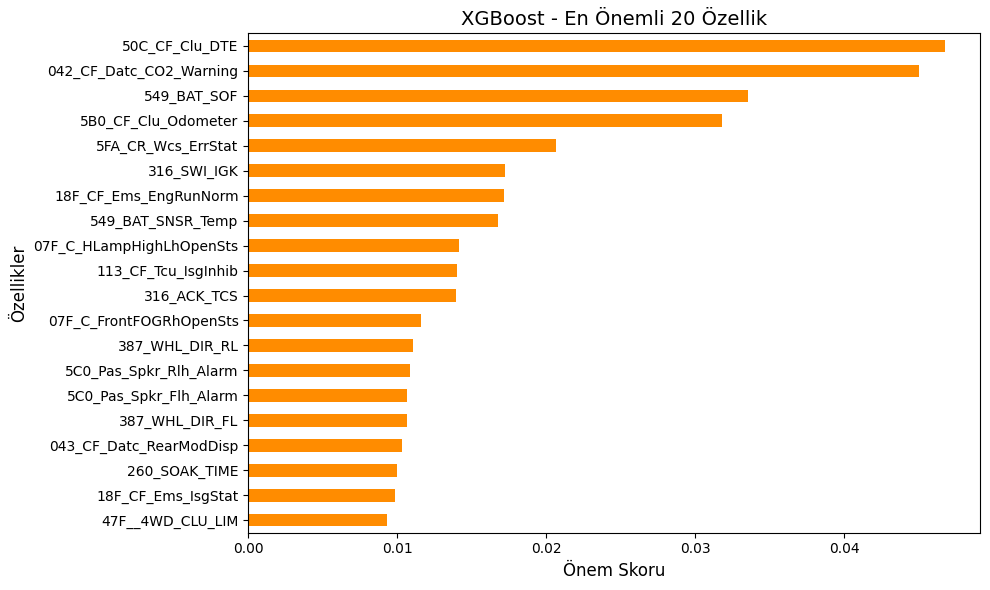

In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_sample_weight
import xgboost as xgb
from sklearn.metrics import confusion_matrix 
from sklearn import metrics

df = pd.read_parquet('C:/Users/mgoek/secili_siraliveriV2.parquet')

non_numeric_cols = df.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in non_numeric_cols:
    if col != 'label':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

X = df.drop(['label'], axis=1)
y = df['label']
df=pd.DataFrame()

sample_weights = compute_sample_weight('balanced', y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
y=pd.DataFrame()
indexX=X.columns
X=pd.DataFrame()

XGBclassifier = xgb.XGBClassifier(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    n_jobs=-1, 
    max_depth=6
)
XGBclassifier.fit(X_train, y_train)
xgb_pred = XGBclassifier.predict(X_test)


print('Accuracy:', accuracy_score(y_test, xgb_pred))

conf_matrix = confusion_matrix(y_test, xgb_pred)
correctNumberOfPredictionOfTheFirstClass = conf_matrix[0, 0]
falseNumberOfPredictionTheSecondClass = conf_matrix[0, 1]
falseNumberOfPredictionTheFirstClass = conf_matrix[1, 0]
correctNumberOfPredictionOfTheSecondClass = conf_matrix[1, 1]


Sensitivity=correctNumberOfPredictionOfTheFirstClass/float((correctNumberOfPredictionOfTheFirstClass+falseNumberOfPredictionTheFirstClass))
print("\nSensitivity :",Sensitivity)
Specificity=correctNumberOfPredictionOfTheSecondClass/float((correctNumberOfPredictionOfTheSecondClass+falseNumberOfPredictionTheSecondClass))
print("\nSpecificity  :",Specificity)
print('\nClassification Report:\n', classification_report(y_test, xgb_pred))


feature_importances = pd.Series(XGBclassifier.feature_importances_, index=indexX)
top_features = feature_importances.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
top_features.sort_values().plot(kind='barh', color='darkorange')
plt.title('XGBoost - En Önemli 20 Özellik', fontsize=14)
plt.xlabel('Önem Skoru', fontsize=12)
plt.ylabel('Özellikler', fontsize=12)
plt.tight_layout()
plt.savefig('xgboost_feature_importance.png', dpi=300)
plt.show()
with open("siraliveri_top_featuresXGBBoost_V2.txt", "w", encoding="utf-8") as f:
    for feature, importance in top_features.items():
        f.write(f"{feature}: {importance:.6f}\n")


TOP 20 Feature with MLP model

Seçilen Sütunlar:
 ['5B0_CF_Clu_Odometer', '545_TEMP_FUEL', '50C_CF_Clu_AvgFCI', '549_BAT_SNSR_Temp', '50C_CF_Clu_DTE', '549_BAT_SOF', '549_BAT_SOC', '260_AliveCounter', '549_BAT_SNSR_I', '553_CF_Gway_ExtTailAct', '081_CR_Ems_IndAirTemp', '111_CF_Tcu_Alive1', '593_STATUS_TPMS', '556_PID_0Dh', '113_CF_Tcu_Alive3', '112_CF_Tcu_Alive', '557_PID_08h', '111_CF_Tcu_ChkSum1', '18F_R_PAcnC', '547_IntAirTemp', 'label']
Sayısal Olmayan Sütunlar: []
Epoch 1/5


C:\Users\mgoek\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1549/1549 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.4974 - loss: 3.1833 - val_accuracy: 0.5000 - val_loss: 1.4516
Epoch 2/5
1549/1549 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.5001 - loss: 1.4447 - val_accuracy: 0.5000 - val_loss: 1.4351
Epoch 3/5
1549/1549 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.5003 - loss: 1.4341 - val_accuracy: 0.5000 - val_loss: 1.4337
Epoch 4/5
1549/1549 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.5001 - loss: 1.4333 - val_accuracy: 0.5000 - val_loss: 1.4337
Epoch 5/5
1549/1549 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.4999 - loss: 1.4339 - val_accuracy: 0.5000 - val_loss: 1.4337


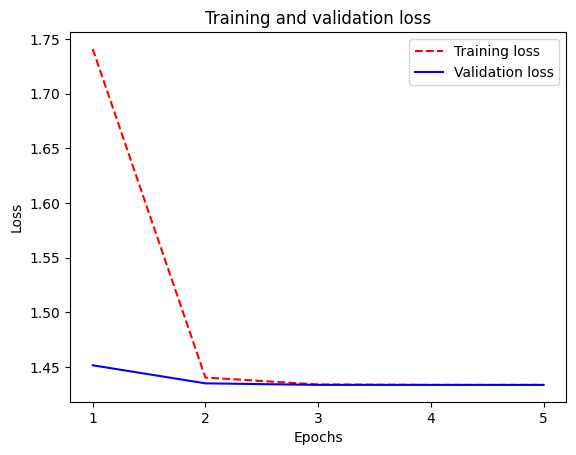

12388/12388 ━━━━━━━━━━━━━━━━━━━━ 12s 942us/step


NameError: name 'batch_size' is not defined

In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib as plt
from tensorflow.keras import regularizers
import numpy as np
import keras
from keras import layers

# 1. Veriyi Yükle ve Sadece İstenen Sütunları Seç
selected_features = [
    "5B0_CF_Clu_Odometer",
    "545_TEMP_FUEL",
    "50C_CF_Clu_AvgFCI",
    "549_BAT_SNSR_Temp",
    "50C_CF_Clu_DTE",
    "549_BAT_SOF",
    "549_BAT_SOC",
    "260_AliveCounter",
    "549_BAT_SNSR_I",
    "553_CF_Gway_ExtTailAct",
    "081_CR_Ems_IndAirTemp",
    "111_CF_Tcu_Alive1",
    "593_STATUS_TPMS",
    "556_PID_0Dh",
    "113_CF_Tcu_Alive3",
    "112_CF_Tcu_Alive",
    "557_PID_08h",
    "111_CF_Tcu_ChkSum1",
    "18F_R_PAcnC",
    "547_IntAirTemp",
    "label"
]


df = pd.read_parquet('C:/Users/mgoek/birlesik_dosya.parquet', columns=selected_features)
print("Seçilen Sütunlar:\n", df.columns.tolist())

non_numeric_cols = df.select_dtypes(include=['object']).columns.tolist()
non_numeric_cols = [col for col in non_numeric_cols if col != 'label']

print("Sayısal Olmayan Sütunlar:", non_numeric_cols)

label_encoders = {}
for col in non_numeric_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le  

from sklearn.preprocessing import StandardScaler

X = df.drop(['label'], axis=1)
y = df['label']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_valid, X_test, y_valid, y_test = train_test_split(
    X_test, y_test, test_size=0.5, random_state=42, stratify=y_test
)

from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_valid = to_categorical(y_valid)

from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

model = keras.Sequential([
    layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
    layers.GlobalAveragePooling1D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(6, activation='softmax')
])

model.compile(
    optimizer="adam",  
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    batch_size=2048,
    epochs=5, 
    validation_data=(X_valid, y_valid)
)

import matplotlib.pyplot as plt
history_dict = history.history

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
val_acc = history_dict["val_accuracy"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "r--", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()

y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)  

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["NORMAL", "FABR", "FUZZ", "MASQ", "SUSP", "REPL"]))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

history_df = pd.DataFrame(history.history)
accuracy = history_df.loc[4, ['accuracy']]
print(accuracy)


The code that uses all the features and gives all the features as txt is random forest.

In [1]:



import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import gc



df = pd.read_parquet('C:/Users/mgoek/secili_siraliveriV2.parquet',engine='pyarrow')
print("Veri Tipleri:\n", df.dtypes)  



non_numeric_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Sayısal Olmayan Sütunlar:", non_numeric_cols)


label_encoders = {}
for col in non_numeric_cols:
    if col not in ['label']:  
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le  

print("veri ön işleme başladı breakpoint")
X = df.drop(['label'], axis=1)
y = df['label']
df=pd.DataFrame()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

y=pd.DataFrame()
indexX=X.columns
X=pd.DataFrame()
gc.collect()



model = RandomForestClassifier(random_state=42, n_jobs=-1)
model.fit(X_train, y_train)


print("predict")
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

print("Model Performansı:\n", classification_report(y_test, y_pred))


feature_importances = pd.Series(model.feature_importances_, index=indexX)
top_features = feature_importances.sort_values(ascending=False).head(670)

plt.figure(figsize=(10, 6))
top_features.sort_values().plot(kind='barh')
plt.title('En Önemli 20 Özellik')
plt.tight_layout()
plt.show()

with open("top_features_seciliveriV2_RFC.txt", "w", encoding="utf-8") as f:
    for feature, importance in top_features.items():
        f.write(f"{feature}: {importance:.6f}\n")


Veri Tipleri:
 042_CR_Datc_DrTempDispC        float32
042_CR_Datc_DrTempDispF        float32
042_CR_Datc_PsTempDispC        float32
042_CR_Datc_PsTempDispF        float32
042_CR_Datc_RearDrTempDispC    float32
                                ...   
5FA_CF_Ods_WgtStat             float32
5FA_CF_Ods_OccStat             float32
5FA_CR_Wcs_ErrStat             float32
5FA_CR_Wcs_ClassStat           float32
label                            int64
Length: 689, dtype: object
Sayısal Olmayan Sütunlar: ['112_CUR_GR']
veri ön işleme başladı breakpoint
test ayırımı
model eğitimi


MemoryError: Unable to allocate 8.21 GiB for an array with shape (3203310, 688) and data type float32

Write txt code with all features with XGBBooost (SEQ WITHOUT REPL)

model oluşturma
Accuracy: 0.9541290504703948

Sensitivity : 1.0

Specificity  : 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368414
           1       0.88      0.81      0.84     99885
           2       1.00      0.98      0.99     65279
           3       0.84      0.86      0.85    101625
           4       0.95      1.00      0.97    101625

    accuracy                           0.95    736828
   macro avg       0.93      0.93      0.93    736828
weighted avg       0.95      0.95      0.95    736828



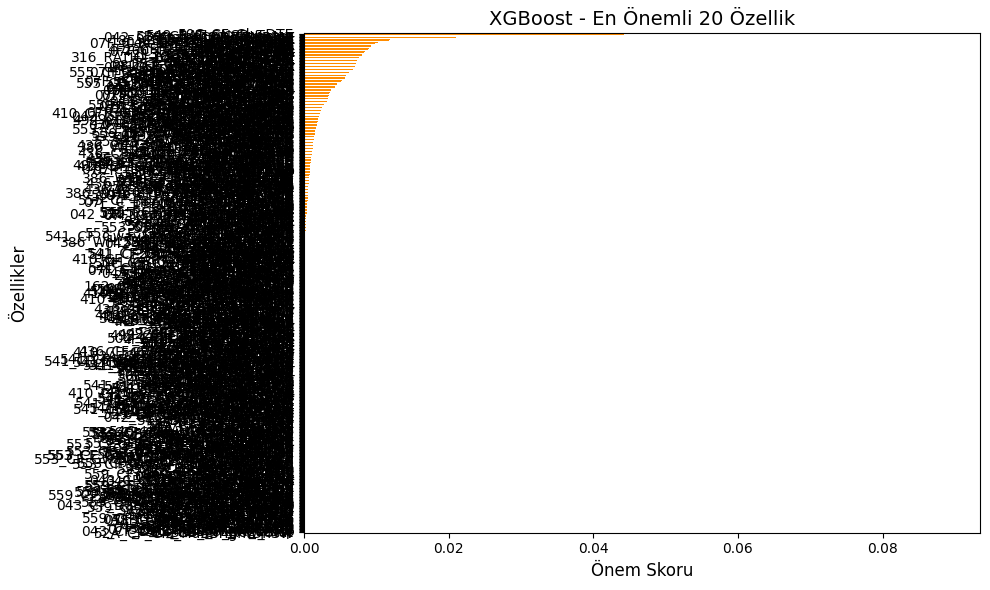

In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_sample_weight
import xgboost as xgb
from sklearn.metrics import confusion_matrix 
from sklearn import metrics

df = pd.read_parquet('C:/Users/mgoek/secili_siraliveri.parquet')

non_numeric_cols = df.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in non_numeric_cols:
    if col != 'label':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

X = df.drop(['label'], axis=1)
y = df['label']
df=pd.DataFrame()

sample_weights = compute_sample_weight('balanced', y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
y=pd.DataFrame()
indexX=X.columns
X=pd.DataFrame()
XGBclassifier = xgb.XGBClassifier(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=6
)
XGBclassifier.fit(X_train, y_train)
xgb_pred = XGBclassifier.predict(X_test)

print('Accuracy:', accuracy_score(y_test, xgb_pred))

conf_matrix = confusion_matrix(y_test, xgb_pred)
correctNumberOfPredictionOfTheFirstClass = conf_matrix[0, 0]
falseNumberOfPredictionTheSecondClass = conf_matrix[0, 1]
falseNumberOfPredictionTheFirstClass = conf_matrix[1, 0]
correctNumberOfPredictionOfTheSecondClass = conf_matrix[1, 1]

Sensitivity=correctNumberOfPredictionOfTheFirstClass/float((correctNumberOfPredictionOfTheFirstClass+falseNumberOfPredictionTheFirstClass))
print("\nSensitivity :",Sensitivity)
Specificity=correctNumberOfPredictionOfTheSecondClass/float((correctNumberOfPredictionOfTheSecondClass+falseNumberOfPredictionTheSecondClass))
print("\nSpecificity  :",Specificity)
print('\nClassification Report:\n', classification_report(y_test, xgb_pred))

feature_importances = pd.Series(XGBclassifier.feature_importances_, index=indexX)
top_features = feature_importances.sort_values(ascending=False).head(670)

plt.figure(figsize=(10, 6))
top_features.sort_values().plot(kind='barh', color='darkorange')
plt.title('XGBoost - En Önemli 20 Özellik', fontsize=14)
plt.xlabel('Önem Skoru', fontsize=12)
plt.ylabel('Özellikler', fontsize=12)
plt.tight_layout()
plt.savefig('xgboost_feature_importance.png', dpi=300)
plt.show()

with open("siraliveri_top_featuresXGBBoost.txt", "w", encoding="utf-8") as f:
    for feature, importance in top_features.items():
        f.write(f"{feature}: {importance:.6f}\n")


Top 20 Feature RFC (Shuffled)

In [1]:



import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


selected_features = [
    "5B0_CF_Clu_Odometer",
    "545_TEMP_FUEL",
    "50C_CF_Clu_AvgFCI",
    "549_BAT_SNSR_Temp",
    "50C_CF_Clu_DTE",
    "549_BAT_SOF",
    "549_BAT_SOC",
    "260_AliveCounter",
    "549_BAT_SNSR_I",
    "553_CF_Gway_ExtTailAct",
    "081_CR_Ems_IndAirTemp",
    "111_CF_Tcu_Alive1",
    "593_STATUS_TPMS",
    "556_PID_0Dh",
    "113_CF_Tcu_Alive3",
    "112_CF_Tcu_Alive",
    "557_PID_08h",
    "111_CF_Tcu_ChkSum1",
    "18F_R_PAcnC",
    "547_IntAirTemp",
    "label"
]


df = pd.read_parquet('C:/Users/mgoek/birlesik_dosya.parquet', columns=selected_features)
print("Veri Tipleri:\n", df.dtypes)  

non_numeric_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Sayısal Olmayan Sütunlar:", non_numeric_cols)


label_encoders = {}
for col in non_numeric_cols:
    if col not in ['label']:  
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le  


print("veri ön işleme başladı breakpoint")
X = df.drop(['label'], axis=1)
y = df['label']
df=pd.DataFrame()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

y=pd.DataFrame()
X=pd.DataFrame()



model = RandomForestClassifier(random_state=42, n_jobs=-1)
model.fit(X_train, y_train)



y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

print("Model Performansı:\n", classification_report(y_test, y_pred))



Veri Tipleri:
 5B0_CF_Clu_Odometer       float32
545_TEMP_FUEL             float32
50C_CF_Clu_AvgFCI         float32
549_BAT_SNSR_Temp         float32
50C_CF_Clu_DTE            float32
549_BAT_SOF               float32
549_BAT_SOC               float32
260_AliveCounter          float32
549_BAT_SNSR_I            float32
553_CF_Gway_ExtTailAct    float32
081_CR_Ems_IndAirTemp     float32
111_CF_Tcu_Alive1         float32
593_STATUS_TPMS           float32
556_PID_0Dh               float32
113_CF_Tcu_Alive3         float32
112_CF_Tcu_Alive          float32
557_PID_08h               float32
111_CF_Tcu_ChkSum1        float32
18F_R_PAcnC               float32
547_IntAirTemp            float32
label                       int64
dtype: object
Sayısal Olmayan Sütunlar: []
veri ön işleme başladı breakpoint
test ayırımı
model eğitimi
predict
Model Accuracy: 0.7551
Model Performansı:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    396414
       

Top 20 Features XGBoost (shuffled)

In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_sample_weight
import xgboost as xgb
from sklearn.metrics import confusion_matrix 
from sklearn import metrics

selected_features = [
    "50C_CF_Clu_DTE",
    "042_CF_Datc_CO2_Warning",
    "5B0_CF_Clu_Odometer",
    "549_BAT_SOF",
    "251_CF_Mdps_Def",
    "5FA_CR_Wcs_ErrStat",
    "5C0_Pas_Spkr_Flh_Alarm",
    "18F_CF_Ems_EngRunNorm",
    "07F_C_FrontEXTTailRhOpenSts",
    "043_CF_Datc_ModDisp",
    "251_CF_Mdps_FailStat",
    "111_TCU_TYPE",
    "07F_C_HLampHighLhOpenSts",
    "044_CR_Datc_OutTempF",
    "316_RATIO_TQI_BAS_MAX_STND",
    "260_SOAK_TIME",
    "07F_C_FrontTSIGRhOpenSts",
    "387_WHL_DIR_RR",
    "220_CYL_PRESS_DIAG",
    "07F_C_RearFOGLhOpenSts",
    "label"
]


df = pd.read_parquet('C:/Users/mgoek/birlesik_dosya.parquet', columns=selected_features)

# 2. Kategorik Değişkenleri Dönüştürme
non_numeric_cols = df.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in non_numeric_cols:
    if col != 'label':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

# 3. Veri Ayırma
X = df.drop(['label'], axis=1)
y = df['label']
df=pd.DataFrame()
# Sınıf ağırlıklarını hesapla (dengesiz veri setleri için)
sample_weights = compute_sample_weight('balanced', y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
y=pd.DataFrame()
indexX=X.columns
X=pd.DataFrame()
print("model oluşturma")
XGBclassifier = xgb.XGBClassifier(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=6
)
XGBclassifier.fit(X_train, y_train)
xgb_pred = XGBclassifier.predict(X_test)

# Sonuçları yazdırıyoruz
print('Accuracy:', accuracy_score(y_test, xgb_pred))

# karışıklık matrisi üzerinden değerleri ayırıyoruz
conf_matrix = confusion_matrix(y_test, xgb_pred)
correctNumberOfPredictionOfTheFirstClass = conf_matrix[0, 0]
falseNumberOfPredictionTheSecondClass = conf_matrix[0, 1]
falseNumberOfPredictionTheFirstClass = conf_matrix[1, 0]
correctNumberOfPredictionOfTheSecondClass = conf_matrix[1, 1]

#yukarıda ayırdığımız değerlerle sensivity, specificity ve f1 score gibi değerleri yazdırıyoruz 
Sensitivity=correctNumberOfPredictionOfTheFirstClass/float((correctNumberOfPredictionOfTheFirstClass+falseNumberOfPredictionTheFirstClass))
print("\nSensitivity :",Sensitivity)
Specificity=correctNumberOfPredictionOfTheSecondClass/float((correctNumberOfPredictionOfTheSecondClass+falseNumberOfPredictionTheSecondClass))
print("\nSpecificity  :",Specificity)
print('\nClassification Report:\n', classification_report(y_test, xgb_pred))

#11.54
#11.55

model oluşturma
Accuracy: 0.7475000882915336

Sensitivity : 1.0

Specificity  : 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    396414
           1       0.48      0.12      0.19     99885
           2       1.00      0.93      0.96     65279
           3       0.51      0.16      0.25    101625
           4       0.38      0.89      0.53    113625
           5       0.49      0.41      0.44     16000

    accuracy                           0.75    792828
   macro avg       0.64      0.58      0.56    792828
weighted avg       0.77      0.75      0.72    792828



RFC All features (SEQ WITH Repl)

İşlenecek kategorik sütunlar: ['112_CUR_GR']
  112_CUR_GR sütunu dönüştürülüyor...
test ayırma başladı
model eğitim başladı

--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    400381
           1       0.95      0.94      0.95     99895
           2       1.00      0.99      0.99     64997
           3       0.95      0.96      0.95    101880
           4       0.99      1.00      0.99    101590
           5       1.00      1.00      1.00     32085

    accuracy                           0.99    800828
   macro avg       0.98      0.98      0.98    800828
weighted avg       0.99      0.99      0.99    800828


--- Accuracy ---
Test Accuracy: 0.9859

--- Confusion Matrix ---
[[400381      0      0      0      0      0]
 [     0  94172     12   5481    216     14]
 [     0     28  64475      6    479      9]
 [     0   4305     10  97360    192     13]
 [     0    216    119     62 101190      3]
 [    10   

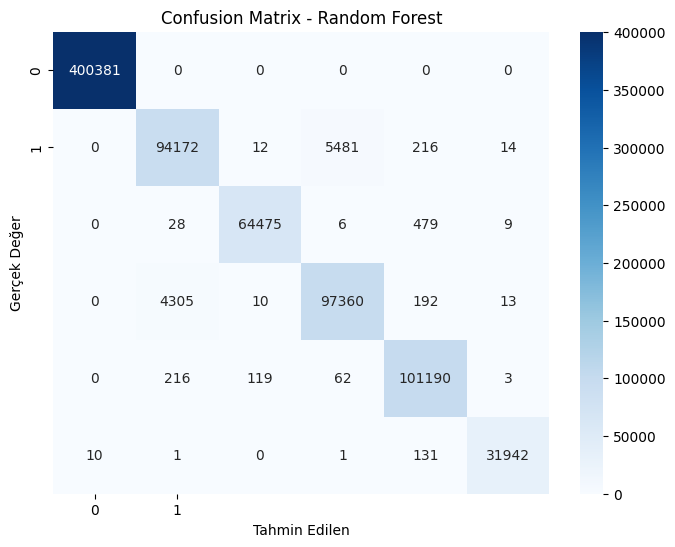

In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import joblib

from sklearn.ensemble import RandomForestClassifier

# 1. Parquet dosyasını yükle
df = pd.read_parquet('C:/Users/mgoek/secili_siraliveriV2.parquet', engine='pyarrow')

# 3. Kategorik sütunları Label Encoding ile sayısala çevir
non_numeric_cols = df.select_dtypes(include=['object']).columns.tolist()

if non_numeric_cols:
    print(f"İşlenecek kategorik sütunlar: {non_numeric_cols}")
    label_encoders = {}
    for col in non_numeric_cols:
        if col != 'label':  # Hedef değişkeni atla
            print(f"  {col} sütunu dönüştürülüyor...")
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
            label_encoders[col] = le
else:
    print("İşlenecek kategorik sütun bulunamadı")
del non_numeric_cols
gc.collect()
# 4. Özellikler ve hedef değişkeni ayır
X = df.drop(['label'], axis=1)  # Özellikler (label sütunlarını çıkar)
y = df['label']  # Binary hedef
df=pd.DataFrame()
print("test ayırma başladı")
# 5. Train-test ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X=pd.DataFrame()
y=pd.DataFrame()
print("model eğitim başladı")
model = RandomForestClassifier(random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# 7. Test verisi ile tahmin yap
y_pred = model.predict(X_test)
joblib.dump(model, 'C:/Users/mgoek/rfc_large_model.joblib', compress=('gzip', 3))
# 8. Performansı değerlendir
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

print("\n--- Accuracy ---")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")

print("\n--- Confusion Matrix ---")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# 9. Confusion Matrix'i görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['0', '1'], 
            yticklabels=['0', '1'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.title('Confusion Matrix - Random Forest')
plt.show()
#10.38

Overfitting Test


2
İşlenecek kategorik sütunlar: ['112_CUR_GR']
  112_CUR_GR sütunu dönüştürülüyor...
label
0    313414
1     78973
Name: count, dtype: int64

--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      0.13      0.23    313414
           1       0.00      0.00      0.00     78973
           2       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

    accuracy                           0.10    392387
   macro avg       0.20      0.03      0.05    392387
weighted avg       0.80      0.10      0.18    392387


--- Accuracy ---
Test Accuracy: 0.1022

--- Confusion Matrix ---


C:\Users\mgoek\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mgoek\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mgoek\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

[[ 40115     20 113269  99609  60401]
 [     0      0  78969      4      0]
 [     0      0      0      0      0]
 [     0      0      0      0      0]
 [     0      0      0      0      0]]


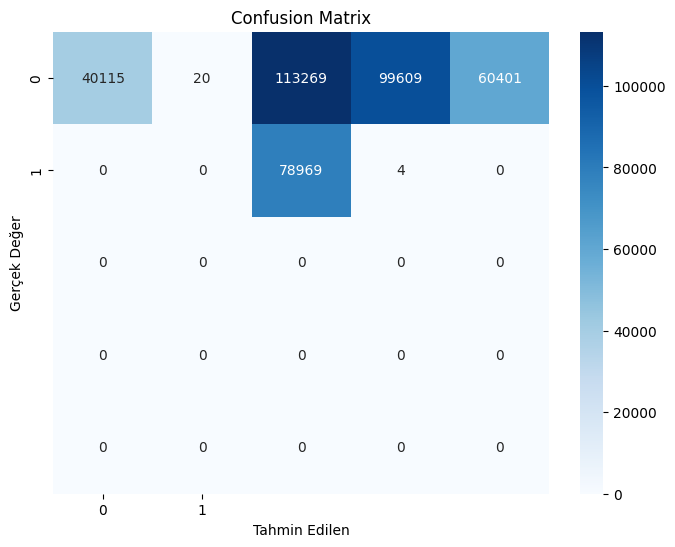

In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

df = pd.read_parquet('E:/dahili harddisk/XCandis Dataset/signal/dump6-fuzz-90.parquet', engine='pyarrow')

print(df['label'].nunique())

non_numeric_cols = df.select_dtypes(include=['object']).columns.tolist()

if non_numeric_cols:
    print(f"İşlenecek kategorik sütunlar: {non_numeric_cols}")
    label_encoders = {}
    for col in non_numeric_cols:
        if col != 'label':  # Hedef değişkeni atla
            print(f"  {col} sütunu dönüştürülüyor...")
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
            label_encoders[col] = le
else:
    print("İşlenecek kategorik sütun bulunamadı")

X = df.drop(['label'], axis=1)  
y = df['label']  

label_counts = df['label'].value_counts()
print(label_counts)

loaded_model = joblib.load('C:/Users/mgoek/rfc_large_model.joblib')



predictions = loaded_model.predict(X)

print("\n--- Classification Report ---")
print(classification_report(y, predictions))

print("\n--- Accuracy ---")
print(f"Test Accuracy: {accuracy_score(y, predictions):.4f}")

print("\n--- Confusion Matrix ---")
conf_matrix = confusion_matrix(y, predictions)
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.title('Confusion Matrix')
plt.show()
